## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
display(merge_df.sort_values("Timepoint"))


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1529,s619,Stelasyn,Male,22,30,0,45.000000,0
558,a818,Naftisol,Female,12,28,0,45.000000,0
1531,t198,Propriva,Male,22,26,0,45.000000,0
551,a788,Zoniferol,Male,5,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
174,a644,Ramicane,Female,7,17,45,32.978522,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
689,c559,Zoniferol,Female,19,28,45,61.840058,4
706,c757,Placebo,Male,9,27,45,69.042841,3


In [7]:
# Checking the number of mice.
mice_num = merge_df['Mouse ID'].nunique()
print(mice_num)

249


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_duplicates = merge_df[merge_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
display(merge_duplicates)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_df = clean_df.reset_index()
display(clean_df)

#Check that duplicates have been dropped
clean_duplicates = clean_df[clean_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
display(clean_duplicates)

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [31]:
# Checking the number of mice in the clean DataFrame.
mice_num = clean_df['Mouse ID'].nunique()
print(mice_num)

249


## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_time_drug = clean_df.groupby(['Timepoint', 'Drug Regimen'])
summary = grouped_time_drug[['Tumor Volume (mm3)']].mean()

summary = pd.merge(summary, grouped_tumor[['Tumor Volume (mm3)']].median(), 
                   on = ['Timepoint', 'Drug Regimen'])

summary = pd.merge(summary, grouped_tumor[['Tumor Volume (mm3)']].var(), 
                   on = ['Timepoint', 'Drug Regimen'])

summary = pd.merge(summary, grouped_tumor[['Tumor Volume (mm3)']].std(), 
                   on = ['Timepoint', 'Drug Regimen'])

summary = pd.merge(summary, grouped_tumor[['Tumor Volume (mm3)']].sem(), 
                   on = ['Timepoint', 'Drug Regimen'])

summary.columns = ['mean', 'median', 'variance', 'standard deviation', 'standard error of the mean']






In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
display(summary)
# Using the aggregation method, produce the same summary statistics in a single line


mean     median   variance  standard deviation  \
Timepoint Drug Regimen                                                        
0         Capomulin     45.000000  45.000000   0.000000            0.000000   
          Ceftamin      45.000000  45.000000   0.000000            0.000000   
          Infubinol     45.000000  45.000000   0.000000            0.000000   
          Ketapril      45.000000  45.000000   0.000000            0.000000   
          Naftisol      45.000000  45.000000   0.000000            0.000000   
...                           ...        ...        ...                 ...   
45        Placebo       68.084082  69.042841  20.098783            4.483167   
          Propriva      66.258529  64.957562  24.967290            4.996728   
          Ramicane      34.955595  34.848627  30.101010            5.486439   
          Stelasyn      68.438310  69.299149  27.340818            5.228845   
          Zoniferol     65.960888  65.684689  14.100301            3.755037   

                        standard error of the mean  
Timepoint Drug Regimen                              
0         Capomulin                       0.000000  
          Ceftamin                        0.000000  
          Infubinol                       0.000000  
          Ketapril                        0.000000  
          Naftisol                        0.000000  
...                                            ...  
45        Placebo                         1.351726  
          Propriva                        1.888586  
          Ramicane                        1.226805  
          Stelasyn                        1.576556  
          Zoniferol                       1.003576  

[100 rows x 5 columns]

## Bar and Pie Charts

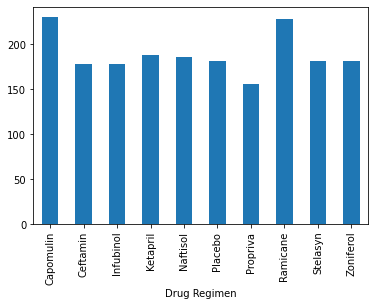

In [97]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
grouped_drug = clean_df.groupby([ 'Drug Regimen'])
measurement_number = grouped_drug.size()

drug_list = sorted(clean_df['Drug Regimen'].unique())


measurement_number.plot(kind = 'bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

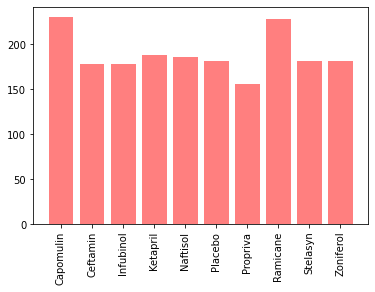

In [94]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drug_list, measurement_number, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")


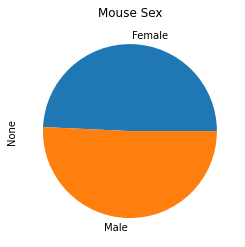

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_sex_count = clean_df.groupby([ 'Sex']).size()

grouped_sex_count.plot.pie(labels = ['Female', 'Male'])


([<matplotlib.patches.Wedge at 0x2744be3fdd8>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')])

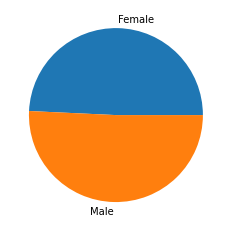

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(grouped_sex_count, labels = ['Female', 'Male'])


## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = clean_df[clean_df['Timepoint'] == 45]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,9,k403,Ramicane,Male,21,16,45,22.050126,1
19,19,s185,Capomulin,Female,3,17,45,23.343598,1
29,29,x401,Capomulin,Female,16,15,45,28.484033,0
39,39,m601,Capomulin,Male,22,17,45,28.430964,1
49,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
1840,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1850,1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1867,1872,z581,Infubinol,Female,24,25,45,62.754451,3
1877,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs_df = pd.DataFrame()
quartile_merge = pd.DataFrame()



display(quartile_merge)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
for i in treatment:
    final_timepoint_drugs = final_timepoint[final_timepoint['Drug Regimen'] == i]
    Q1 = pd.DataFrame([final_timepoint_drugs['Tumor Volume (mm3)'].quantile(0.25)])
    Q2 = pd.DataFrame([final_timepoint_drugs['Tumor Volume (mm3)'].quantile(0.50)])
    Q3 = pd.DataFrame([final_timepoint_drugs['Tumor Volume (mm3)'].quantile(0.75)])
    IQR = pd.DataFrame([Q3 - Q1])
    
    # add subset 
        quartiles=pd.DataFrame([i])
    quartiles=pd.concat([quartiles, Q1], axis = 1)
    quartiles=pd.concat([quartiles, Q2], axis = 1)
    quartiles=pd.concat([quartiles, Q3], axis = 1)
    quartiles=pd.concat([quartiles, IQR], axis = 1)
    quartile_merge = quartile_merge.append(quartiles)
    
    drugs_df = drugs_df.append(final_timepoint_drugs)

quartile_merge.columns = ['Treatments', 'First Quartile', 'Second Quartile', 'Third Quartile', 'IQR']
display(drugs_df)

    
    # Determine outliers using upper and lower bounds
    

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,19,s185,Capomulin,Female,3,17,45,23.343598,1
29,29,x401,Capomulin,Female,16,15,45,28.484033,0
39,39,m601,Capomulin,Male,22,17,45,28.430964,1
104,104,u364,Capomulin,Male,18,17,45,31.023923,3
124,124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...,...
1665,1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1768,1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1792,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1840,1845,y769,Ceftamin,Female,6,27,45,68.594745,4


,Treatments,First Quartile,Second Quartile,Third Quartile,IQR
0,Capomulin,32.377357,37.311846,40.159220,7.781863
0,Ramicane,30.981175,34.848627,38.508305,7.527130
0,Infubinol,62.754451,66.083066,67.685569,4.931117
0,Ceftamin,61.433892,64.299830,67.527482,6.093590


([<matplotlib.axis.XTick at 0x2744d18d860>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

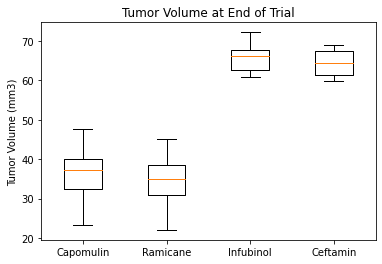

In [226]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
        
fig1, ax = plt.subplots()
ax.set_title('Tumor Volume at End of Trial')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot([drugs_df[drugs_df['Drug Regimen'] == treatment[0]]['Tumor Volume (mm3)'], 
           drugs_df[drugs_df['Drug Regimen'] == treatment[1]]['Tumor Volume (mm3)'],
           drugs_df[drugs_df['Drug Regimen'] == treatment[2]]['Tumor Volume (mm3)'],
           drugs_df[drugs_df['Drug Regimen'] == treatment[3]]['Tumor Volume (mm3)']])
plt.xticks([1, 2, 3, 4], [treatment[0], treatment[1],treatment[2],treatment[3]])


## Line and Scatter Plots

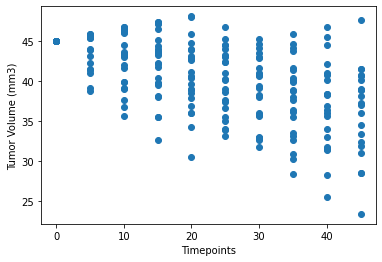

In [230]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_values = clean_df[clean_df['Drug Regimen'] == treatment[0]]['Timepoint']
y_values = clean_df[clean_df['Drug Regimen'] == treatment[0]]['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

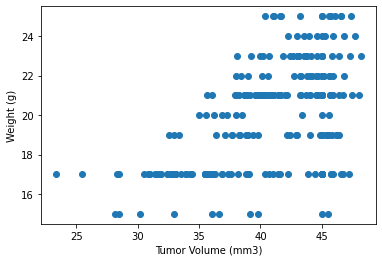

In [231]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = clean_df[clean_df['Drug Regimen'] == treatment[0]]['Tumor Volume (mm3)']
y_values = clean_df[clean_df['Drug Regimen'] == treatment[0]]['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

## Correlation and Regression

In [242]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(clean_df[clean_df['Drug Regimen'] == treatment[0]]['Tumor Volume (mm3)'], 
                                                        clean_df[clean_df['Drug Regimen'] == treatment[0]]['Weight (g)'])
regression = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

display(line_eq)

st.pearsonr(clean_df[clean_df['Drug Regimen'] == treatment[0]]['Tumor Volume (mm3)'],
                  clean_df[clean_df['Drug Regimen'] == treatment[0]]['Weight (g)'])


'y = 0.29x + 8.27'

(0.525699555207717, 9.605446629502006e-18)